In [1]:
import torch
import torch.nn as nn

/home/mohammed/environments/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[50.],
         [52.],
         [54.],
         [56.],
         [58.],
         [60.],
         [62.],
         [64.],
         [66.],
         [68.]]))

In [3]:
len(X), len(Y)

(50, 50)

# spllitting Data into train and test

In [4]:
train_split = int(0.8 * len(X))
# x -> features
# y -> labels
x_train, y_train = X[:train_split],Y[:train_split]
x_test , y_test = X[train_split:],Y[train_split:]

len(x_train), len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [5]:
x_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[50.],
         [52.],
         [54.],
         [56.],
         [58.],
         [60.],
         [62.],
         [64.],
         [66.],
         [68.]]))

# Visualizing using Matplotlib

In [6]:
import matplotlib.pyplot as plt


def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plot training data, test data and compare predictions.
    """
    plt.figure(figsize=(10,7))

    # plot train data
    plt.scatter(train_data, train_labels,c='b',s=4,label="Training Data")

    # plot test data
    plt.scatter(test_data, test_labels,c='r',s=4, label="Testing data")
    
    # checking for pred
    if predictions is not None:
        plt.scatter(test_data, predictions,c='g',s=4, label="Prediction")

    plt.legend(prop={"size":14})

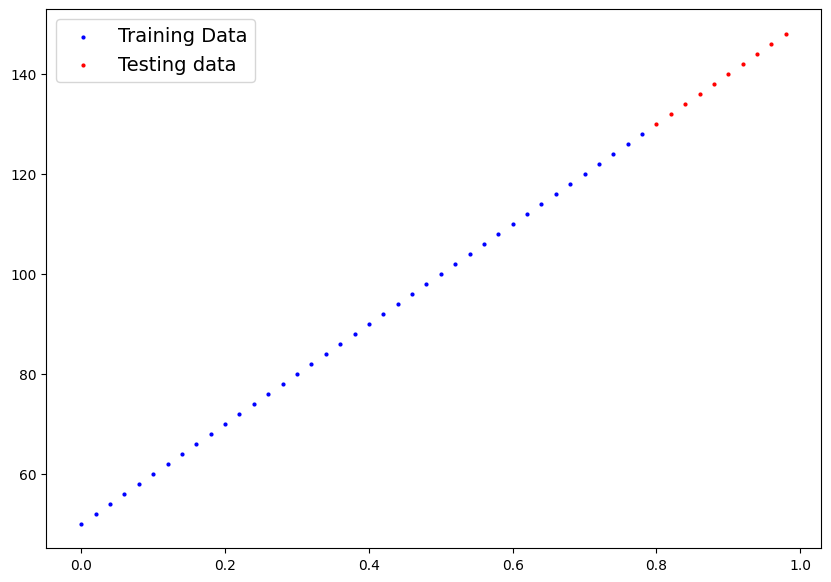

In [7]:
plot_prediction()

# Model Bulding

In [8]:
# Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Checking content of pytorch model
### check model parameters using `.parameters()`

In [9]:
# For reproducibility manual seed
torch.manual_seed(42)

# Model instance
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions using `torch.inference_mode()`
#### Let's see how well it predicts `y_test`(test labels) with `x_test` (test data)

In [11]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[130.],
         [132.],
         [134.],
         [136.],
         [138.],
         [140.],
         [142.],
         [144.],
         [146.],
         [148.]]))

In [12]:
# Making prediction
with torch.inference_mode(): 
    y_preds = model_0(x_test)

# with torch.no_grad(): 
#     y_preds = model_0(x_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

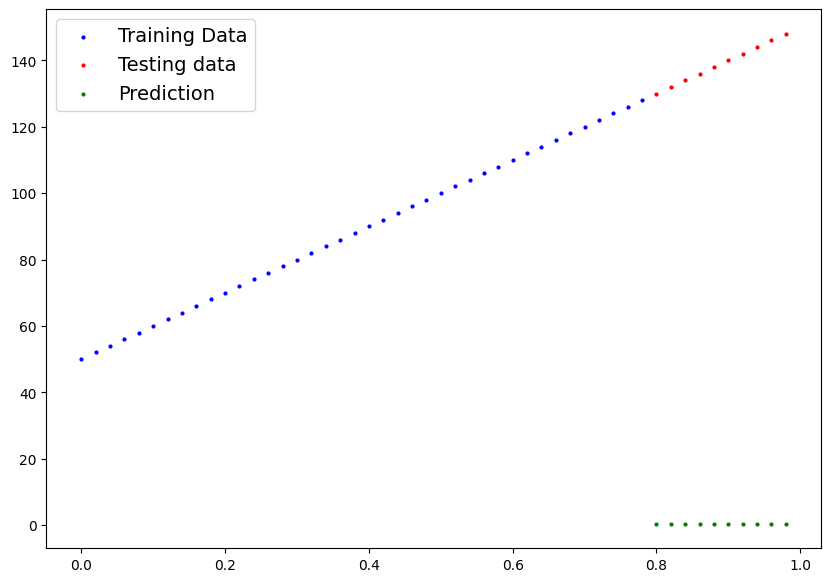

In [13]:
plot_prediction(predictions=y_preds)

# Training Model

In [14]:
# Set up a loss function
loss_fn = nn.L1Loss() # Mean Absolute Error

# Set up an optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.001)


## Building train and test loop

1. Looping through data
2. Forward Pass
3. Calculate the loss
4. optimizer zero grad
5. loss backward
6. optimizer step

In [15]:
# Before the epoch see the params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
torch.manual_seed(42)

epoch_count = []
loss_value = []
test_loss_value = []

epochs = 4000

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()


    # 1. Forward pass
    y_preds = model_0(x_train)

    #2. Loss caluculation
    loss = loss_fn(y_preds, y_train)

    #3 . optimizer zero grad
    optimizer.zero_grad()

    # 4. Backprop on the loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer (perform gradient descent)
    optimizer.step()

    model_0.eval() # turns off gradaient tracking

    with torch.inference_mode():
        test_pred = model_0(x_test)

        test_loss = loss_fn(test_pred,y_test)


    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")

    

Epoch: 0 | Loss: 88.73988342285156 | Test Loss: 138.5701904296875 
Epoch: 10 | Loss: 88.72835540771484 | Test Loss: 138.55673217773438 
Epoch: 20 | Loss: 88.71684265136719 | Test Loss: 138.54324340820312 
Epoch: 30 | Loss: 88.705322265625 | Test Loss: 138.52975463867188 
Epoch: 40 | Loss: 88.69380187988281 | Test Loss: 138.5163116455078 
Epoch: 50 | Loss: 88.6822738647461 | Test Loss: 138.50283813476562 
Epoch: 60 | Loss: 88.6707534790039 | Test Loss: 138.48934936523438 
Epoch: 70 | Loss: 88.65923309326172 | Test Loss: 138.47589111328125 
Epoch: 80 | Loss: 88.64771270751953 | Test Loss: 138.46241760253906 
Epoch: 90 | Loss: 88.63619232177734 | Test Loss: 138.4489288330078 
Epoch: 100 | Loss: 88.62467193603516 | Test Loss: 138.43548583984375 
Epoch: 110 | Loss: 88.61314392089844 | Test Loss: 138.42202758789062 
Epoch: 120 | Loss: 88.60163879394531 | Test Loss: 138.4085235595703 
Epoch: 130 | Loss: 88.59010314941406 | Test Loss: 138.3950653076172 
Epoch: 140 | Loss: 88.5785903930664 | Te

In [17]:
# after one epoch
model_0.state_dict()

OrderedDict([('weights', tensor([1.8968])), ('bias', tensor([4.1287]))])

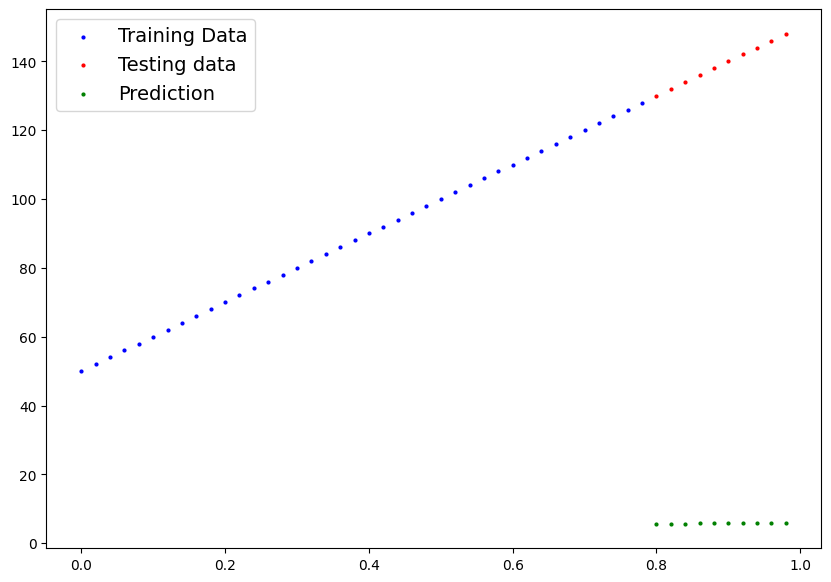

In [18]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)
plot_prediction(predictions=y_preds_new)

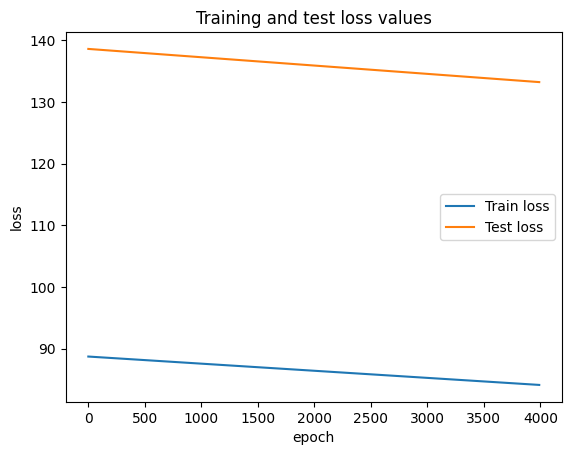

In [19]:
# plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()), label="Train loss")
plt.plot(epoch_count,test_loss_value,label="Test loss")
plt.title("Training and test loss values")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

# Saving the model

#### Main 3 methods to remember
1. `torch.save()` - for saving in in pickle
2. `torch.load()` - for loading
3. `torch.nn.Module.load_state_dict()` - to load model's state dict

In [20]:
model_0

LinearRegressionModel()

In [21]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to : {MODEL_SAVE_PATH}')

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/model_0.pt


# Loading the model

Since we saved our model's `state_dict()` we'll create an instance of our model and load the saved `state_dict` into taht

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.8968])), ('bias', tensor([4.1287]))])

In [23]:
loaded_model_0 = LinearRegressionModel()

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([1.8968])), ('bias', tensor([4.1287]))])

In [27]:
# Predicting with loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(x_test)

loaded_model_0_preds

tensor([[5.6461],
        [5.6841],
        [5.7220],
        [5.7599],
        [5.7979],
        [5.8358],
        [5.8737],
        [5.9117],
        [5.9496],
        [5.9876]])

In [28]:
# Comparing the loaded model and first model
y_preds_new == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Review

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

/home/mohammed/environments/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.__version__

'1.13.0+cu117'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device : {device}')

device : cuda


## Data

In [4]:
# creating data using lindear Regression formula y = weight * X + bias

weight = 100
bias = 50

X = torch.arange(0,3,.02).unsqueeze(dim=1)
Y = weight * X + bias
Y
train_split = int(0.8 * len(X))

x_train, x_test = X[:train_split] , X[train_split:]
y_train, y_test = Y[:train_split] , Y[train_split:]

len(x_train), len(y_train) , len(x_test) , len(y_test)

(120, 120, 30, 30)

In [5]:
def plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels,c='r', s=4, label='Traing data')
    plt.scatter(test_data, test_labels, c='b',s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'g', s=4,label='Prediction' )

    plt.legend()

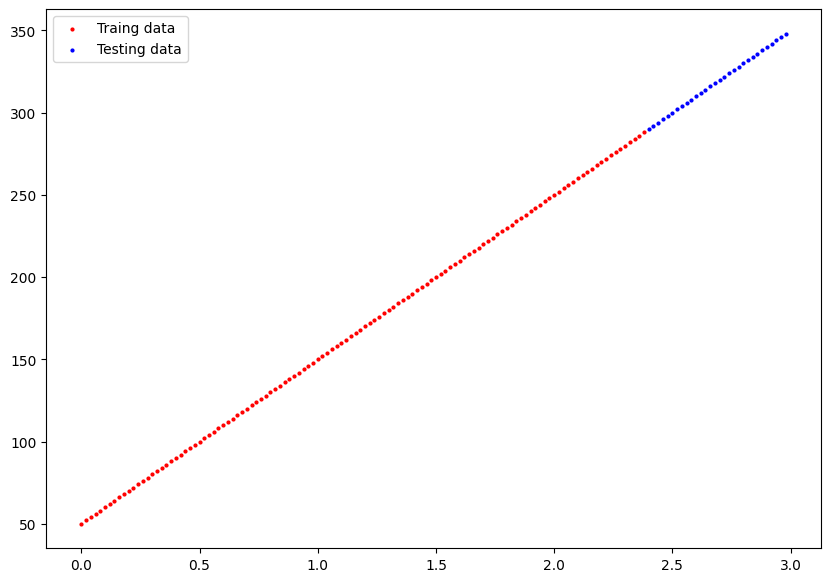

In [6]:
plot_prediction()

## Model

In [7]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x:torch.Tensor):
        return self.linear_layer(x)

In [8]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [9]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [10]:
# Checking the working device
next(model_1.parameters()).device

device(type='cpu')

In [11]:
model_1.to(device=device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [12]:
# Put data on the cuda (device agnostic code for data)

x_train = x_train.to(device=device)
y_train = y_train.to(device=device)
x_test = x_test.to(device=device)
y_test = y_test.to(device=device)


In [13]:
with torch.inference_mode():
    model_1_preds = model_1(x_test)
model_1_preds

tensor([[2.6649],
        [2.6802],
        [2.6955],
        [2.7108],
        [2.7261],
        [2.7414],
        [2.7566],
        [2.7719],
        [2.7872],
        [2.8025],
        [2.8178],
        [2.8331],
        [2.8484],
        [2.8637],
        [2.8790],
        [2.8943],
        [2.9096],
        [2.9248],
        [2.9401],
        [2.9554],
        [2.9707],
        [2.9860],
        [3.0013],
        [3.0166],
        [3.0319],
        [3.0472],
        [3.0625],
        [3.0778],
        [3.0930],
        [3.1083]], device='cuda:0')

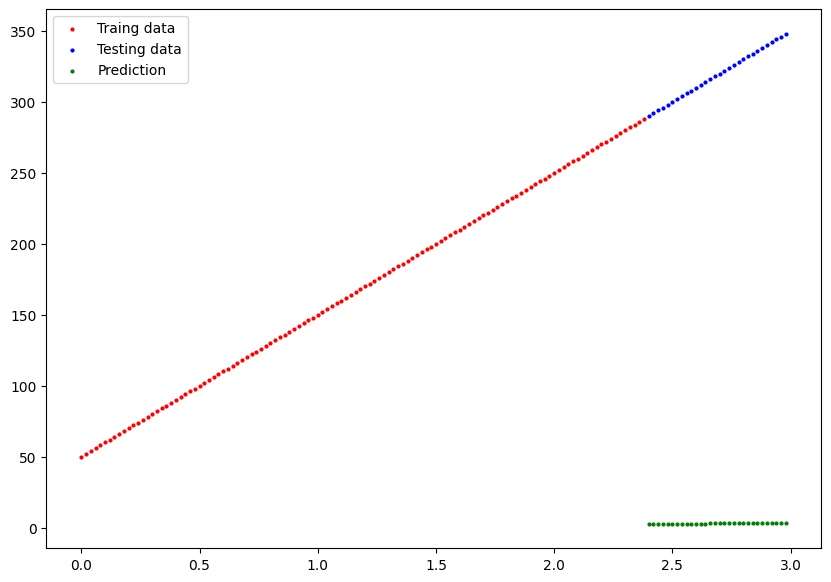

In [14]:
plot_prediction(predictions=model_1_preds.cpu())

## Training

In [15]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_1.parameters(),lr=1)

In [16]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [17]:
torch.manual_seed(42)

epoch_count = []
loss_values =[]
test_loss_values = []

epochs = 130


for epoch in range(epochs):
    model_1.train()

    yPreds = model_1(x_train)

    loss = loss_fn(yPreds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_preds = model_1(x_test)

        test_loss = loss_fn(test_preds, y_test)

    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'epoch : {epoch} | loss : {loss} | test loss : {test_loss}')


epoch : 0 | loss : 167.26019287109375 | test loss : 311.91229248046875
epoch : 1 | loss : 164.84410095214844 | test loss : 307.7112121582031
epoch : 2 | loss : 162.42800903320312 | test loss : 303.5101013183594
epoch : 3 | loss : 160.0118865966797 | test loss : 299.3089904785156
epoch : 4 | loss : 157.59579467773438 | test loss : 295.1078796386719
epoch : 5 | loss : 155.17970275878906 | test loss : 290.90679931640625
epoch : 6 | loss : 152.7635955810547 | test loss : 286.7056884765625
epoch : 7 | loss : 150.34750366210938 | test loss : 282.50457763671875
epoch : 8 | loss : 147.93138122558594 | test loss : 278.303466796875
epoch : 9 | loss : 145.5153045654297 | test loss : 274.1023864746094
epoch : 10 | loss : 143.0991973876953 | test loss : 269.9012756347656
epoch : 11 | loss : 140.68309020996094 | test loss : 265.7001647949219
epoch : 12 | loss : 138.26699829101562 | test loss : 261.4991149902344
epoch : 13 | loss : 135.8509063720703 | test loss : 257.2980041503906
epoch : 14 | loss :

In [18]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[99.4260]], device='cuda:0')),
             ('linear_layer.bias', tensor([50.9300], device='cuda:0'))])

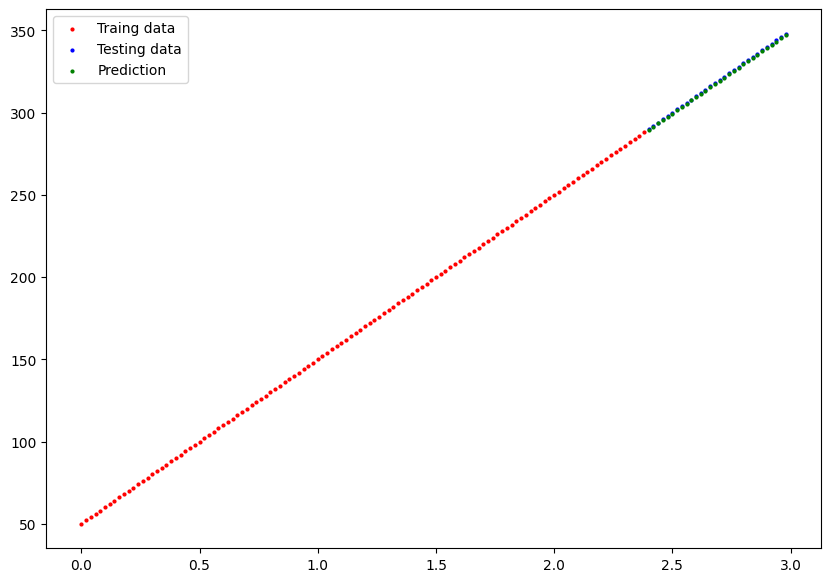

In [19]:
with torch.inference_mode():
    model_1_preds = model_1(x_test)
plot_prediction(predictions=model_1_preds.cpu())

In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[99.4260]], device='cuda:0')),
             ('linear_layer.bias', tensor([50.9300], device='cuda:0'))])

In [21]:
test_loss_values

[tensor(311.9123, device='cuda:0'),
 tensor(307.7112, device='cuda:0'),
 tensor(303.5101, device='cuda:0'),
 tensor(299.3090, device='cuda:0'),
 tensor(295.1079, device='cuda:0'),
 tensor(290.9068, device='cuda:0'),
 tensor(286.7057, device='cuda:0'),
 tensor(282.5046, device='cuda:0'),
 tensor(278.3035, device='cuda:0'),
 tensor(274.1024, device='cuda:0'),
 tensor(269.9013, device='cuda:0'),
 tensor(265.7002, device='cuda:0'),
 tensor(261.4991, device='cuda:0'),
 tensor(257.2980, device='cuda:0'),
 tensor(253.0969, device='cuda:0'),
 tensor(248.8958, device='cuda:0'),
 tensor(244.6947, device='cuda:0'),
 tensor(240.4936, device='cuda:0'),
 tensor(236.2925, device='cuda:0'),
 tensor(232.0914, device='cuda:0'),
 tensor(227.8903, device='cuda:0'),
 tensor(223.6892, device='cuda:0'),
 tensor(219.4881, device='cuda:0'),
 tensor(215.2870, device='cuda:0'),
 tensor(211.0858, device='cuda:0'),
 tensor(206.8848, device='cuda:0'),
 tensor(202.6837, device='cuda:0'),
 tensor(198.4826, device='cu

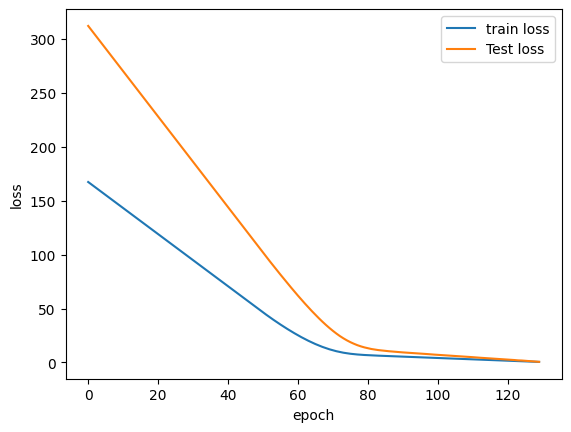

In [22]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [23]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[99.4260]], device='cuda:0')),
             ('linear_layer.bias', tensor([50.9300], device='cuda:0'))])